In [82]:
# 导入工具包
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (16, 12)
%matplotlib inline

In [83]:
# 读入数据
train = pd.read_csv("Ames_House_train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
test = pd.read_csv( "Ames_House_test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## 1.数据探索 

In [87]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


('Skew is', 1.8828757597682129)


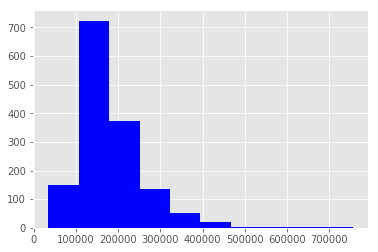

In [89]:
# log tranform?
print ("Skew is", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

('Skew is', 0.12133506220520406)


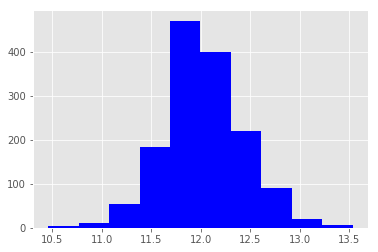

In [90]:
target = np.log(train.SalePrice)
print ("Skew is", target.skew())
plt.hist(target, color='blue')
plt.show()
#log Yes

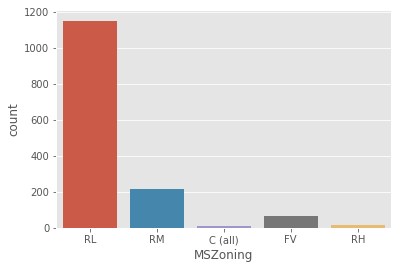

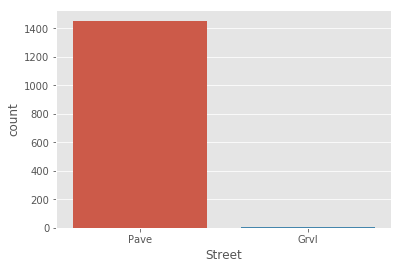

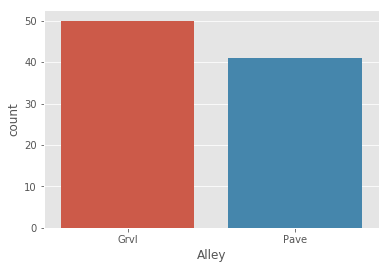

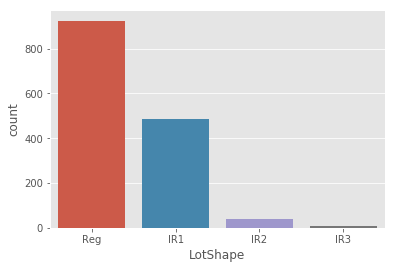

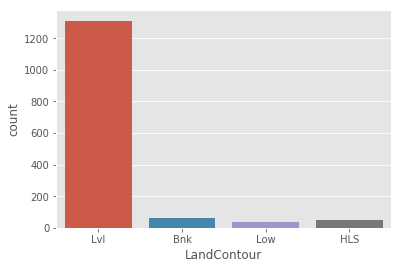

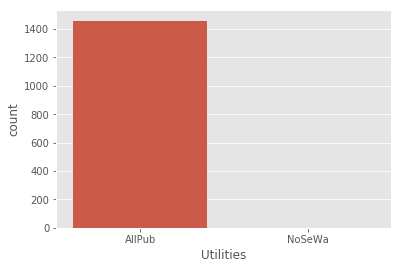

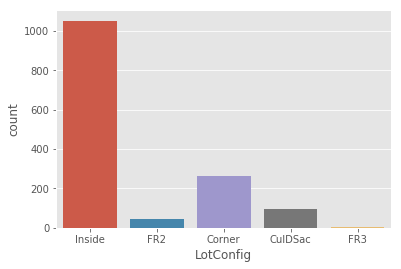

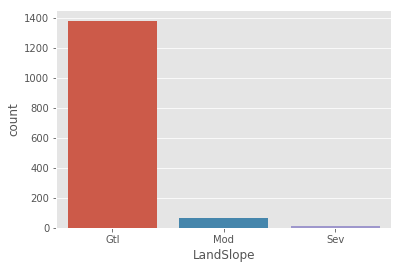

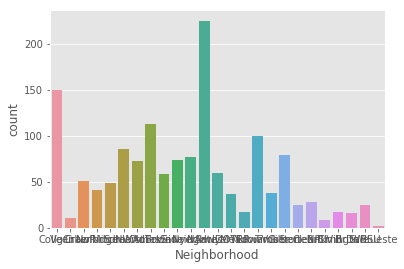

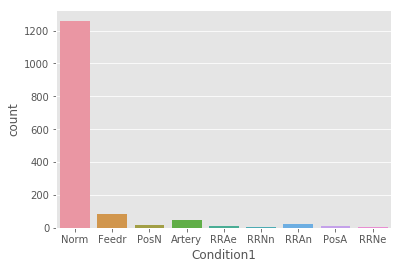

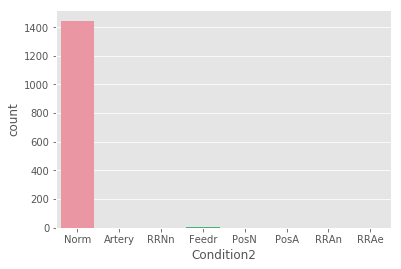

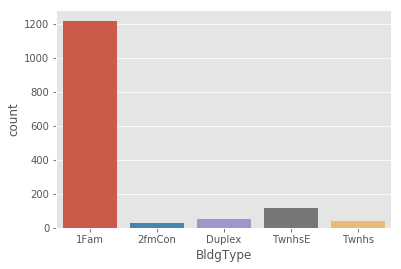

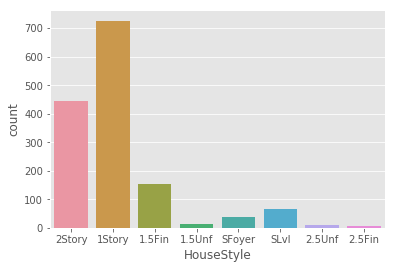

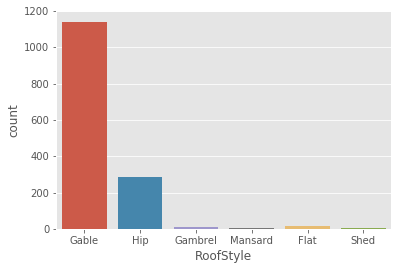

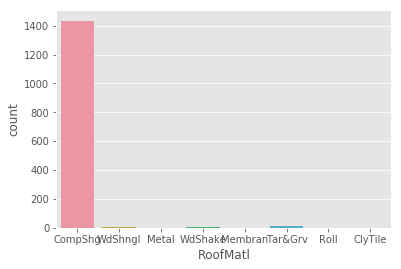

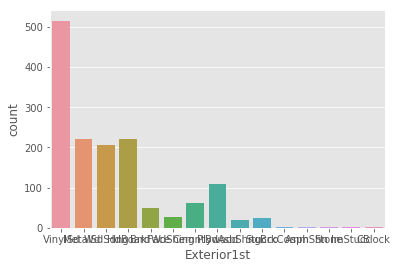

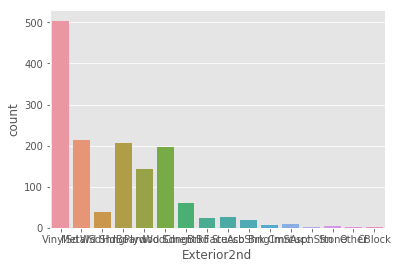

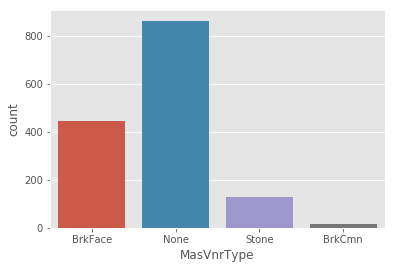

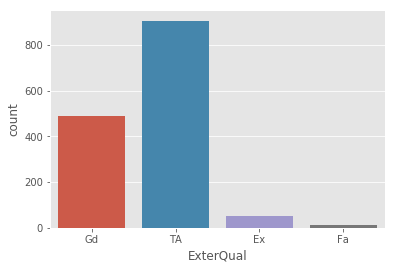

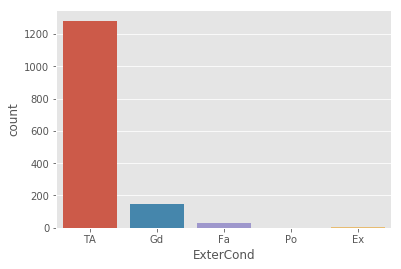

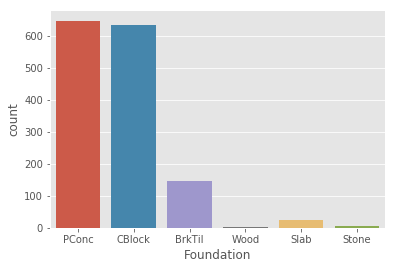

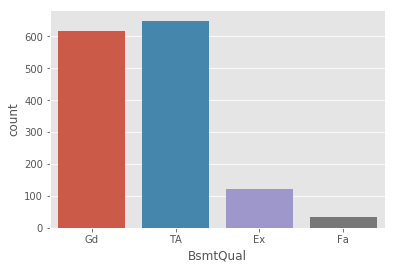

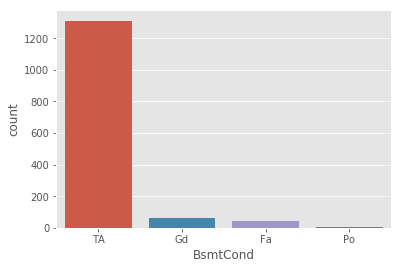

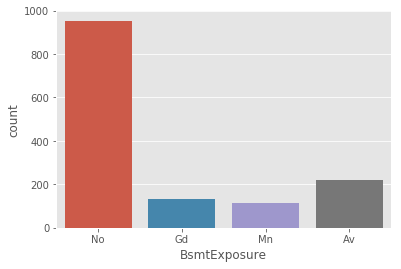

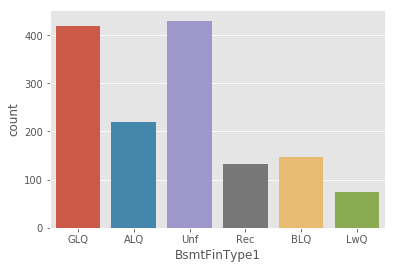

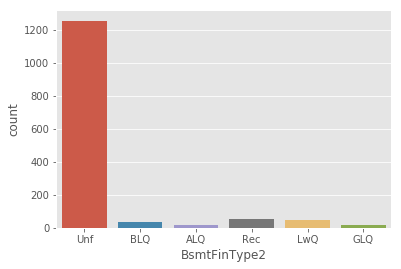

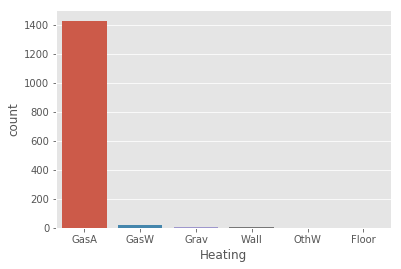

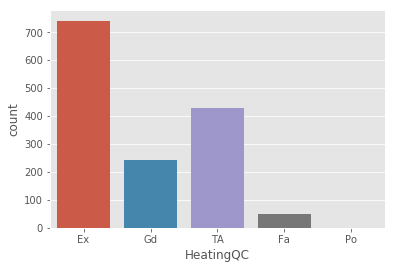

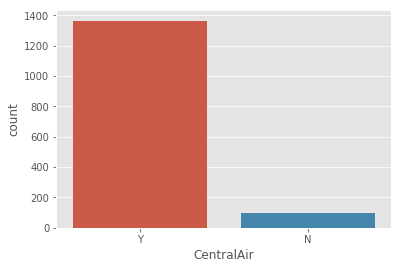

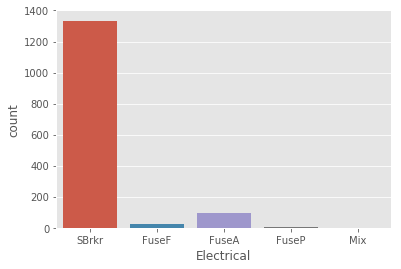

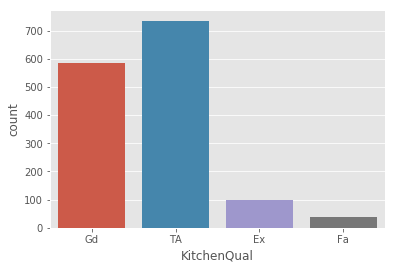

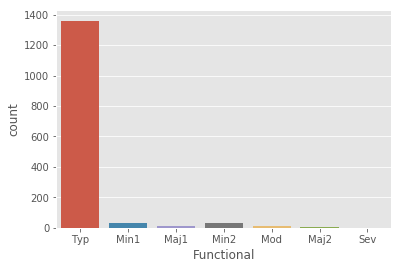

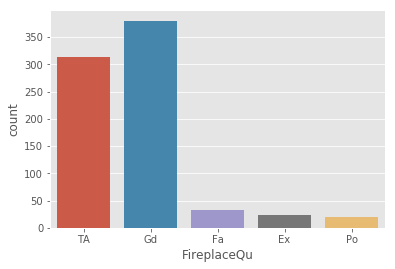

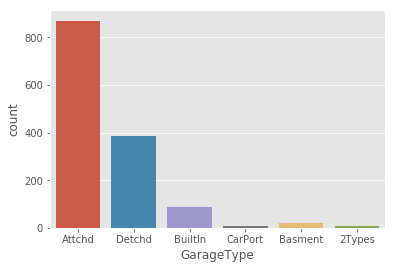

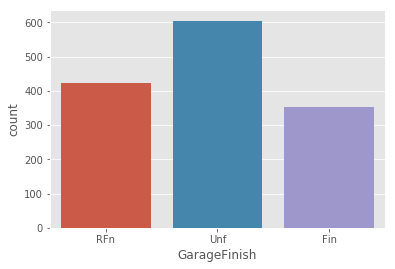

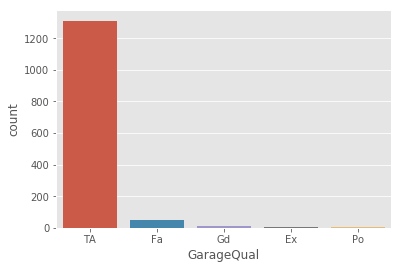

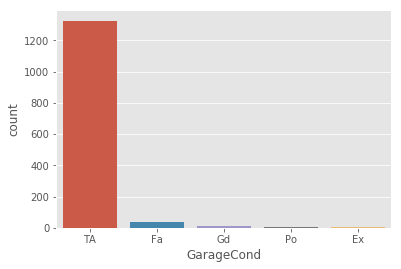

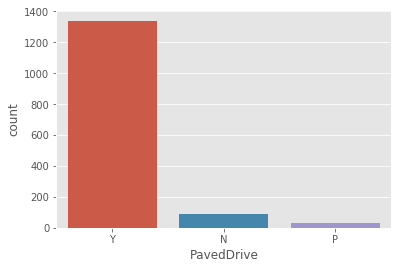

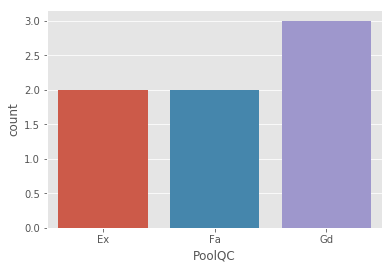

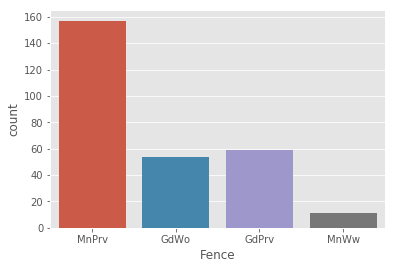

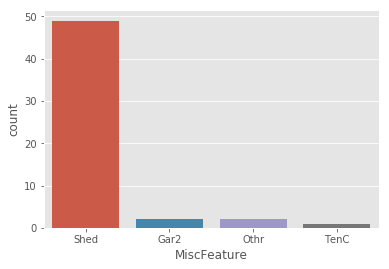

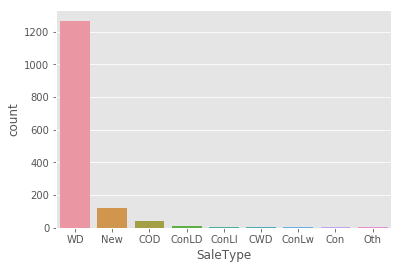

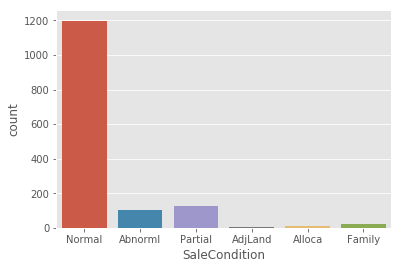

In [91]:
#对类别型特征，观察其取值范围及直方图
categorical_features = train.select_dtypes(include = ["object"]).columns
for col in categorical_features:
    sns.countplot(train[col])
    plt.show()


维数不多，可用独热编码

In [92]:
train.drop(['Id'], inplace = True, axis = 1)  #训练集Id不用，直接舍弃

test_id = test['Id']    #测试集Id暂时不用，存起来，提交时再用
test.drop(['Id'], inplace = True, axis = 1)

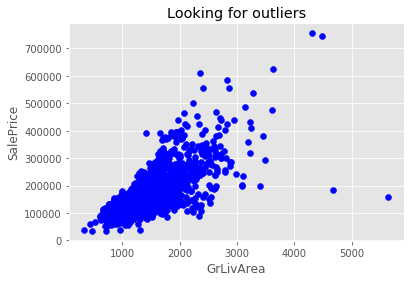

In [93]:
# 离群点检测（outliers），参考该数据集的介绍papper：https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [94]:
train = train[train.GrLivArea < 4000]
temp = train.reindex()
# 移除面积大于4000 square feet的数据点

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-

## 2.1缺失值处理

In [96]:
# 2.1 根据实际含义填补缺失类别型特征

def process_missvalue_by_meaning (df):
    # Alley : data description says NA means "no alley access"
    df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")

    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)

    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)

    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")

    # Condition : NA most likely means Normal，靠近主干道或铁路
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")

    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)

    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")

    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")

    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)

    # Functional : data description says NA means typical，家用（Home）功能性评级
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")

    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)

    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)

    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")

    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)

    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")

    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)

    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")

    # MasVnrType : NA most likely means no veneer，表层砌体（Masonry veneer）类型
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)

    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)

    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)

    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")

    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)

    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")

    # ScreenPorch : NA most likely means no screen porch，观景门廊
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)

    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)

    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")

    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
    
    return df
    
train = process_missvalue_by_meaning(train)
test = process_missvalue_by_meaning(test)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            1456 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 no

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 no

## 2.2 字符型与数值型相互转换

In [99]:
# 数值 2 字符
def numberical2cat(df):
    df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      }, inplace = True)

    return df
train = numberical2cat(train)
test = numberical2cat(test)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null object
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            1456 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 n

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null object
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 n

In [102]:
# 字符 2 数值
def cat2numberical(df):
    df.replace({"Alley" : {"None": 0, "Grvl" : 1, "Pave" : 2},
                "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                "Street" : {"Grvl" : 1, "Pave" : 2},
                "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                       inplace = True
                     )
    return df

train = cat2numberical(train)
test = cat2numberical(test)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null object
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null int64
Alley            1456 non-null int64
LotShape         1456 non-null int64
LandContour      1456 non-null object
Utilities        1456 non-null int64
LotConfig        1456 non-null object
LandSlope        1456 non-null int64
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-nu

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null object
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null object
Utilities        1459 non-null int64
LotConfig        1459 non-null object
LandSlope        1459 non-null int64
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-nu

In [105]:
from sklearn.preprocessing import StandardScaler
def fillna_numerical_train(df):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    numerical_features = numerical_features.drop("SalePrice")
    print("Numerical features : " + str(len(numerical_features)))

    df.info()
    df_num = df[numerical_features]
    #df_num.info()
    
    medians = df_num.median() 
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #df_num.info()
    # 分别初始化对特征和目标值的标准化器
    ss_X = StandardScaler()

    # 对训练特征进行标准化处理
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index)
    
    return df_num, medians, ss_X

train_num, medians, ss_X = fillna_numerical_train(train)

Numerical features : 54
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null object
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null int64
Alley            1456 non-null int64
LotShape         1456 non-null int64
LandContour      1456 non-null object
Utilities        1456 non-null int64
LotConfig        1456 non-null object
LandSlope        1456 non-null int64
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exte

In [106]:
#对测试集的其他数值型特征进行空缺值填补（用训练集中相应列的中值填补）
def fillna_numerical_test(df, medians, ss_X):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    #numerical_features = numerical_features.drop("SalePrice")  #测试集中没有SalePrice
    print("Numerical features : " + str(len(numerical_features)))
    df.info()
    df_num = df[numerical_features]
    
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #对数值特征进行标准化
    temp = ss_X.transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index )
    return df_num

test_num = fillna_numerical_test(test, medians, ss_X)

Numerical features : 54
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null object
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null object
Utilities        1459 non-null int64
LotConfig        1459 non-null object
LandSlope        1459 non-null int64
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exte

## 3 One Hot

In [107]:
def get_dummies_cat(df):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    print("Categorical features : " + str(len(categorical_features)))
    df_cat = df[categorical_features]
    

    # Create dummy features for categorical values via one-hot encoding
    print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    df_cat = pd.get_dummies(df_cat,dummy_na=True)
    print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    return df_cat

#必须考虑类别型特征的取值范围（训练集和测试的取值范围可能不同，编码后的特征维数也不同，会报错）
#train_cat = get_dummies_cat(train)
#test_cat = get_dummies_cat(test)

n_train_samples = train.shape[0]  
train_test = pd.concat((train, test), axis=0)
train_test_cat = get_dummies_cat(train_test)
   
train_cat = train_test_cat.iloc[:n_train_samples, :]
test_cat = train_test_cat.iloc[n_train_samples:, :]

Categorical features : 25
NAs for categorical features in df : 8
Remaining NAs for categorical features in df : 0


In [108]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 225 entries, BldgType_1Fam to SaleType_nan
dtypes: uint8(225)
memory usage: 331.3 KB


In [109]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 225 entries, BldgType_1Fam to SaleType_nan
dtypes: uint8(225)
memory usage: 332.0 KB


## 4 合并所有特征

In [110]:
def joint_num_cat(df_num, df_cat):
    df = pd.concat([df_num, df_cat], axis = 1, ignore_index=True)
    print("New number of features : " + str(df.shape[1]))
    
    return df

FE_train = joint_num_cat(train_num, train_cat)
FE_test = joint_num_cat(test_num, test_cat)

FE_train = pd.concat([FE_train, train['SalePrice']], axis = 1)
FE_test = pd.concat([test_id,FE_test], axis = 1)

FE_train.to_csv('AmesHouse_FE_train.csv', index=False)
FE_test.to_csv('AmesHouse_FE_test.csv', index=False)

New number of features : 279
New number of features : 279


## 5线性回归

In [111]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

from sklearn.metrics import mean_squared_error

In [112]:
train = pd.read_csv("AmesHouse_FE_train.csv")
print("train : " + str(train.shape))

test = pd.read_csv("AmesHouse_FE_test.csv")
print("test : " + str(test.shape))

train : (1456, 280)
test : (1459, 280)


In [113]:
y_train = train["SalePrice"]
X_train = train.drop(['SalePrice'], axis = 1)

test_Id = test['Id']
X_test = test.drop(['Id'], axis = 1)

In [114]:
from sklearn.preprocessing import StandardScaler

mean_y = y_train.mean()
std_y = y_train.std()
y_train = (y_train - mean_y)/std_y

In [115]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
count,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.0
mean,4.614166e-14,-3.271926e-14,2.301055e-13,9.260926e-14,-9.269382e-13,6.070262e-14,-7.155734e-14,5.450036e-14,7.301582e-13,2.256631e-13,...,0.029533,0.002747,0.001374,0.006181,0.003434,0.003434,0.082418,0.002060,0.868819,0.0
std,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,...,0.169353,0.052360,0.037050,0.078405,0.058520,0.058520,0.275094,0.045361,0.337715,0.0
min,-1.691837e+00,-9.281155e-01,-1.554563e+01,-2.433785e-01,-4.486961e+00,-3.814446e+01,-7.007295e+00,-3.716479e+00,-4.109470e+00,-3.285242e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-4.516607e-01,-2.952139e-01,6.432675e-02,-2.433785e-01,-1.028509e+00,2.621613e-02,2.260418e-01,-7.950627e-01,-5.174614e-01,-5.692198e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,1.684272e-01,-9.944678e-02,6.432675e-02,-2.433785e-01,7.007165e-01,2.621613e-02,2.260418e-01,-6.470858e-02,-5.174614e-01,2.698005e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,6.408751e-01,1.155699e-01,6.432675e-02,-2.433785e-01,7.007165e-01,2.621613e-02,2.260418e-01,6.656456e-01,3.805408e-01,9.544021e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,7.550426e+00,2.077593e+01,6.432675e-02,5.125698e+00,7.007165e-01,2.621613e-02,2.260418e-01,2.856708e+00,3.074547e+00,1.285624e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [116]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("RMSE on Training set :", rmse_train)

('RMSE on Training set :', 0.26670361992821517)


In [117]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter = 5000)

sgdr.fit(X_train, y_train)

y_train_pred = sgdr.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("RMSE on Training set :", rmse_train)

('RMSE on Training set :', 0.26770013881977561)


In [124]:
ridge = RidgeCV(alphas = [ 0.1, 1, 5, 10, 15, 18, 20, 50, 100,],store_cv_values=True )

ridge.fit(X_train, y_train)

alpha = ridge.alpha_
print("Best alpha :", alpha)

mse_cv = np.mean(ridge.cv_values_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

y_train_rdg = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_rdg))
print("RMSE on Training set :", rmse_train)

('Best alpha :', 18.0)
('cv of rmse :', 0.3149671477740234)
('RMSE on Training set :', 0.27850688296828569)


('Best alpha :', 0.001)
Try again for more precision with alphas centered around 0.001
('Best alpha :', 0.00090000000000000008)
('cv of rmse :', 0.27962285749911786)
('RMSE on Training set :', 0.27939237026516622)
Lasso picked 119 features and eliminated the other 160 features


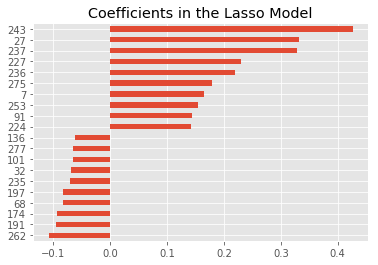

In [125]:
lasso = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                max_iter = 5000)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

mse_cv = np.mean(lasso.mse_path_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

y_train_lasso = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_lasso))
print("RMSE on Training set :", rmse_train)

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [126]:
y_test_pred = lr.predict(X_test)
y_test_pred = y_test_pred * std_y +  mean_y

#生成提交测试结果

#df = pd.DataFrame({"Id":test_Id, 'SalePrice':y_test_pred})
#df.reindex(columns=['Id'])
y = pd.Series(data = y_test_pred, name = 'SalePrice')
df = pd.concat([test_Id, y], axis = 1)
df.to_csv('993735197.csv')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
